# Random Forest Classified for Identifying Breast Cancer

Submitted by Group 1:


*   Daniel Sioldea - 400178137
*   Connor Ricotta - 400199761
*   Mina Nematiandoost - 400423582


# Importing Libraries

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
import lightgbm as lgb

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

warnings.filterwarnings('ignore')

# Importing Raw Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing dataset and setting it as the dataframe

# from google.colab import drive
# drive.mount('/content/drive')

#df = pd.read_csv('breast-cancer.csv')
df = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].value_counts()['M']

212

In [ ]:
df['diagnosis'].value_counts()['B']

357

In [ ]:
df.shape

(569, 32)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Looking at this data, all features except for diagnosis are in numeric format. Diagnosis should be converted to numeric format next.

In [ ]:
# Encoding diagnosis string value to 1 and 0 (1 = Maliognant, 0 = Benine):
encode = LabelEncoder()

df['diagnosis'] = encode.fit_transform(df['diagnosis'])

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Checking for NaN, 0, or Null values in dataset

df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Dropping ID column as it is not necessary in our model

df.drop('id', axis=1, inplace=True)

In [ ]:
# Creating histogram to visualize diagnosis split

# px.histogram(data_frame = df, x = 'diagnosis', color = 'diagnosis', title = 'Diagnosis Histogram')

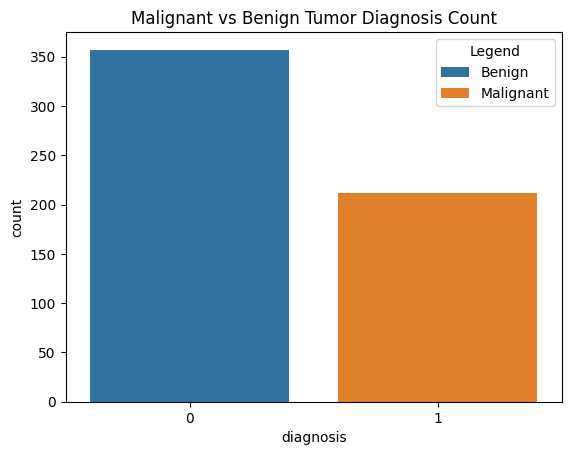

In [ ]:
# Better Diagnosis Split Graph than the one above

g = sns.countplot(data = df, x = 'diagnosis', dodge=False, hue='diagnosis')
plt.legend(title='Legend', loc='upper right', labels=['Benign', 'Malignant'])
plt.title('Malignant vs Benign Tumor Diagnosis Count')
plt.show(g)

In [ ]:
# Pairplot of all features; takes about 15 minutes to compile (ruh roh Raggy)

#sns.pairplot(df, hue = 'diagnosis', palette = 'Dark2')

In [ ]:
# Correlation matrix to identify relevant features

corr = df.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
# Correlation of features vs Diagnosis in Descending order showing highest correlation first

df.corrwith(df['diagnosis']).sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

<Axes: >

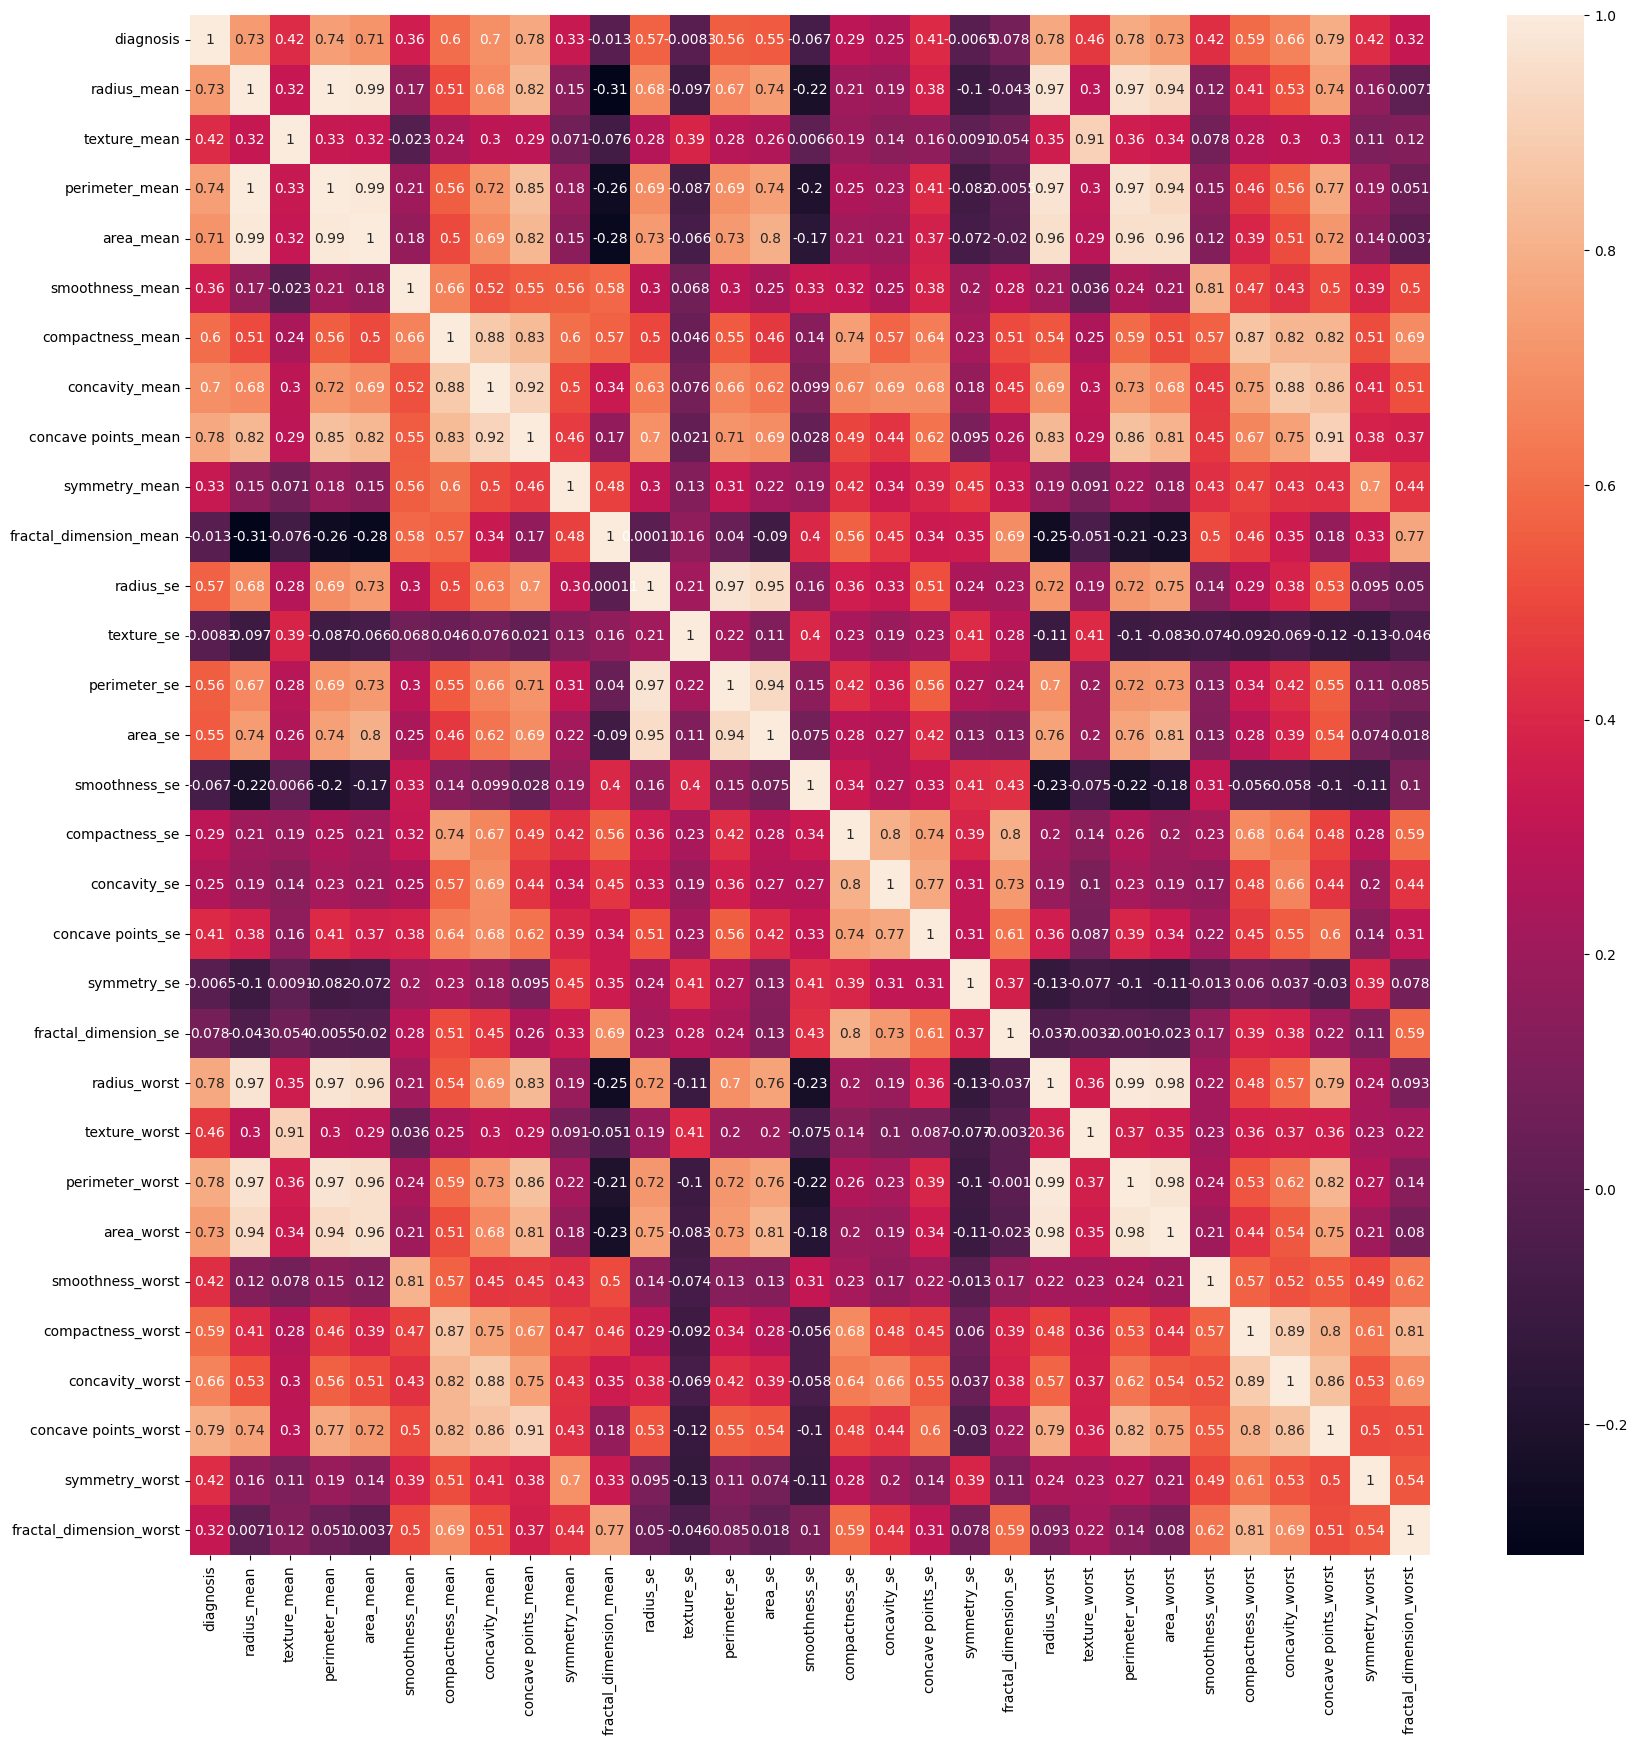

In [ ]:
# Heatmap to show more correlations between features

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

# Removal of Features that are not Correlated

In [ ]:
# Obtain the absolute values of correlation to identify magnitude (higher magnitude = higher correlation)

corrabs = abs(corr['diagnosis'])

# Set threshold to remove uncorrelated features. This removes all features with a magnitude less than the threshold

th = 0.3
best_feat = corrabs[corrabs > th]
best_feat = best_feat.drop('diagnosis')

# Convert feature list to an array (Required to do train/test)

best_feat_arr = [index for index, value in best_feat.iteritems()]
best_feat_arr

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# Feature Scaling

In [ ]:
df[best_feat_arr].values.shape

(569, 23)

In [ ]:
df['diagnosis'].values.shape

(569,)

<Axes: >

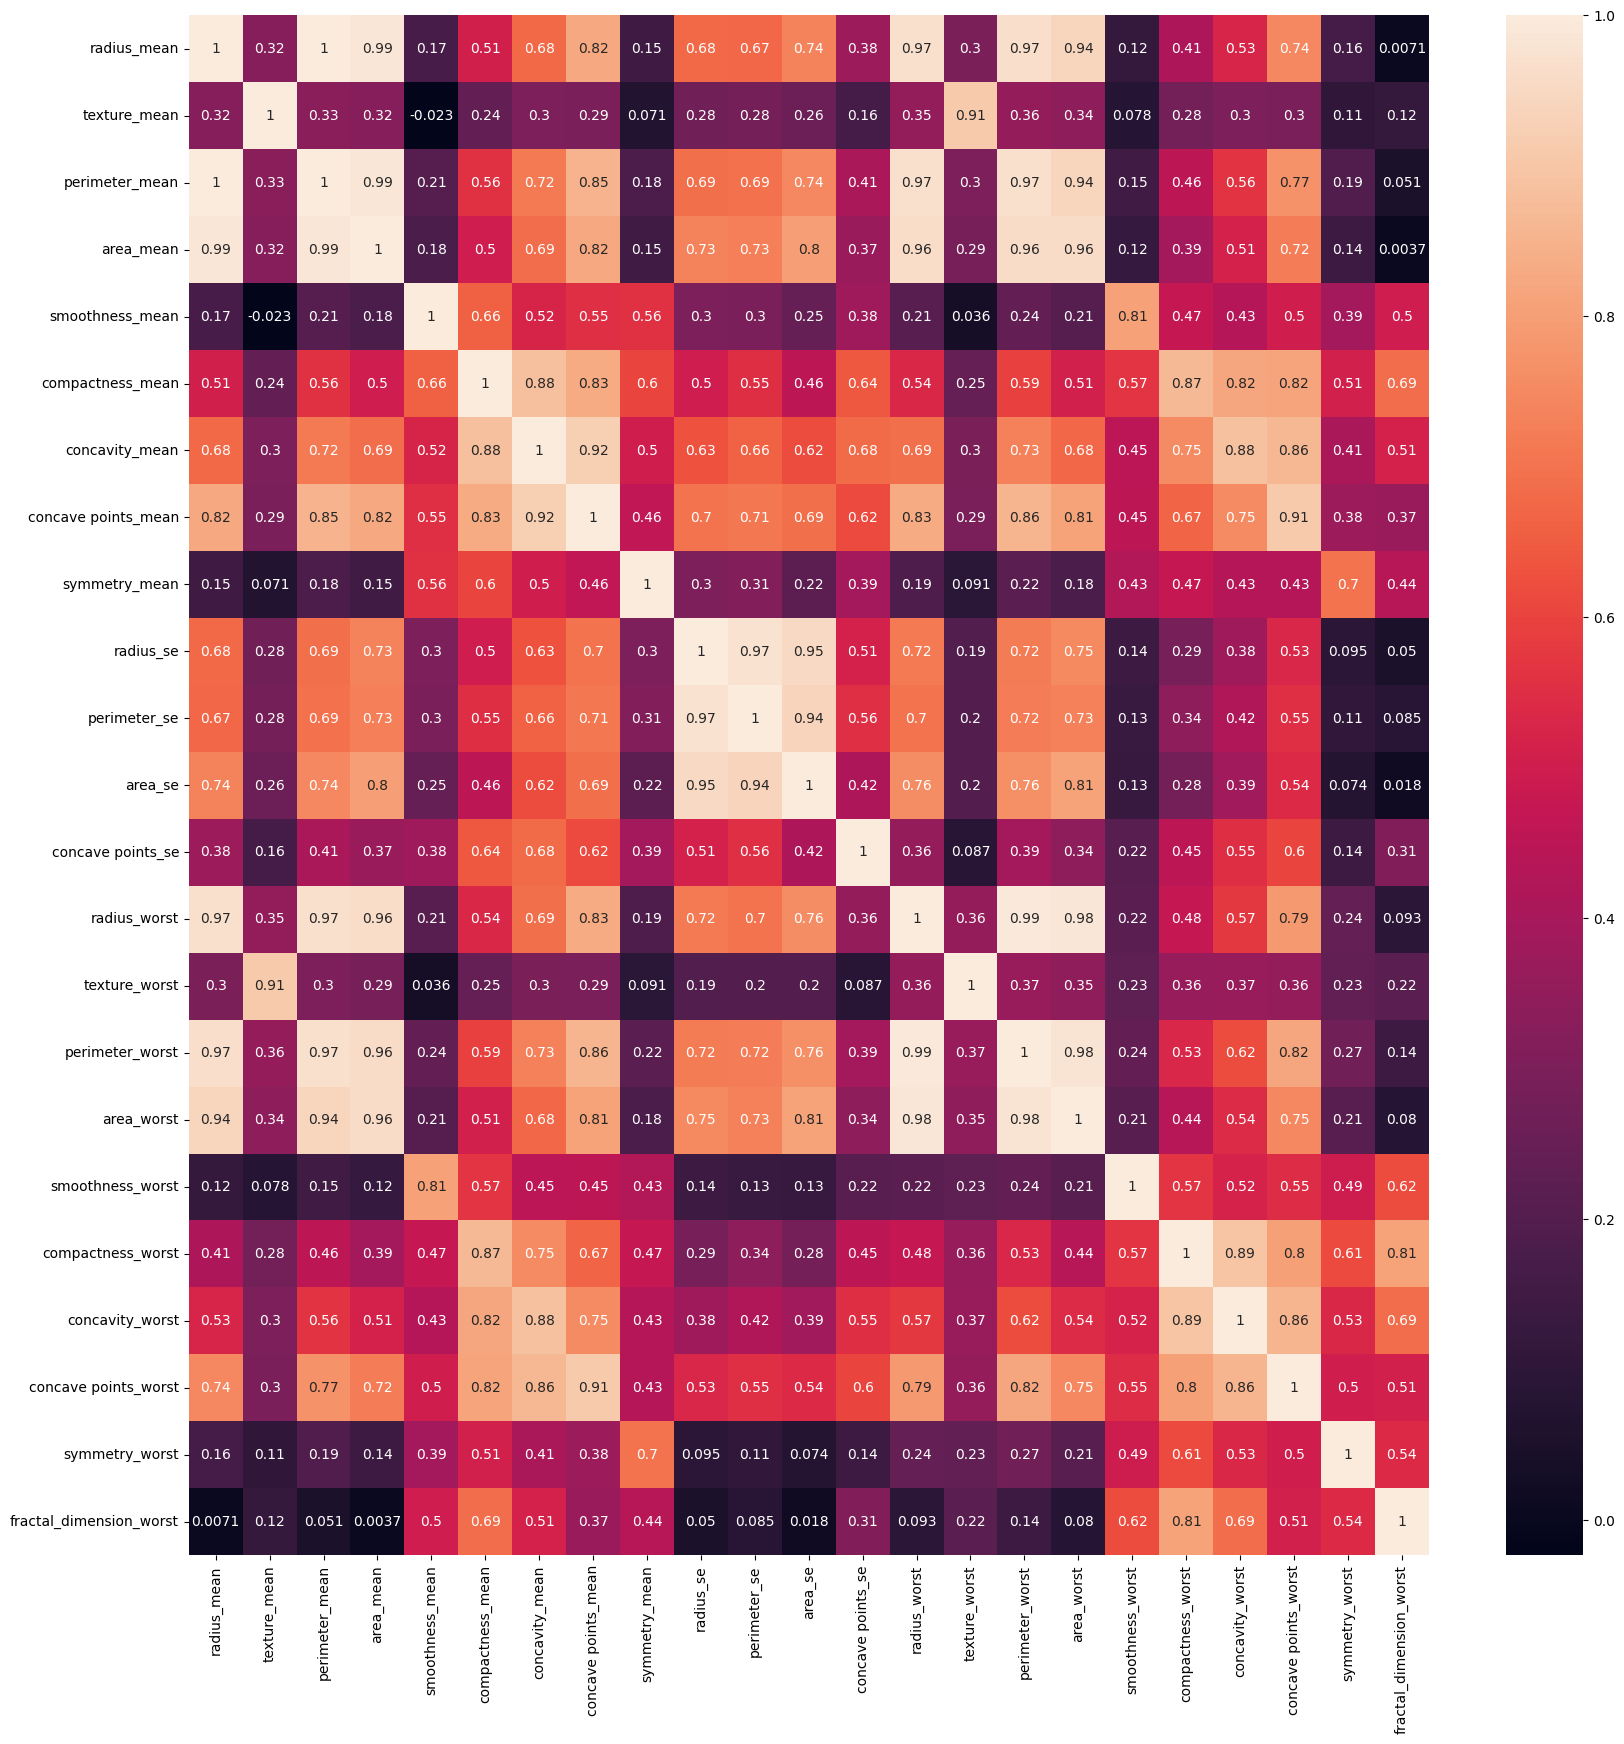

In [ ]:
corr2 = df[best_feat_arr].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr2, annot=True)

In [ ]:
# Creating X and Y variables

X = df[best_feat_arr]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scaling data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initializing Random Forest Model

forest_model = RandomForestClassifier(n_estimators=50, random_state=101)
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=101)

In [ ]:
# Attempt prediction

forest_pred = forest_model.predict(X_test)
forest_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
#intialize ADABOOST Model, single esitimator to find most important feature
ada_model = AdaBoostClassifier(n_estimators=1)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
ada_model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0.])

In [ ]:
most_important = ada_model.feature_importances_.argmax()

In [ ]:
X.columns[most_important]

'concave points_worst'

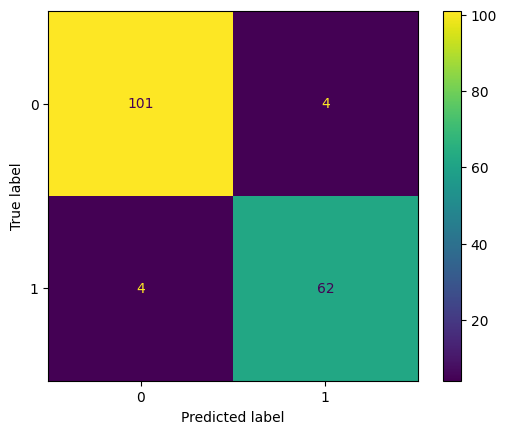

In [ ]:
# Initialize Confusion Matrix

cm = confusion_matrix(y_test,forest_pred)

# Dispaly Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
param_both = {"n_estimators" : [1,5,10,20,30,40,50,60,70,80,90,100], "max_depth": [1,2,3,4,5,6,7,8,9,10]}
param_est = {"n_estimators" : [1,5,10,20,30,40,50,60,70,80,90,100]}
param_depth = {"max_depth": [1,2,3,4,5,6,7,8,9,10]}
param_lgbm = {"learing_rate": [0.01,0.025,0.05,0.075,0.1], "num_iterations" : [10,20,30,40,50,60,70,80,90,100], "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [ ]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test, params):


    grid_model = GridSearchCV(model, params)
    grid_model.fit(X_train, y_train)
    best_params = grid_model.best_params_

    predictions = grid_model.predict(X_test)
    probability = grid_model.predict_proba(X_test)

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    MSE = mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(MSE)
    prob = probability

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, MAE, MSE, RMSE]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'MAE', 'MSE', 'RMSE'])
    return eval_df, best_params, prob

# **Random Forest**

In [ ]:
forest_model_result, forest_bestP, RF_prob = train_evaluate_model(forest_model, X_train, y_train, X_test, y_test, param_both)
forest_model_result.index = ['RandomForest']
results = forest_model_result
forest_model_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,MAE,MSE,RMSE
RandomForest,0.959064,0.947368,0.940299,0.954545,0.958225,0.040936,0.040936,0.202326


In [ ]:
print(RF_prob)

[[1.         0.        ]
 [1.         0.        ]
 [0.99333333 0.00666667]
 [0.1        0.9       ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.92666667 0.07333333]
 [0.99761905 0.00238095]
 [0.03333333 0.96666667]
 [1.         0.        ]
 [0.99146805 0.00853195]
 [1.         0.        ]
 [0.         1.        ]
 [0.99384901 0.00615099]
 [0.99761905 0.00238095]
 [0.99761905 0.00238095]
 [0.         1.        ]
 [0.7162849  0.2837151 ]
 [0.96428571 0.03571429]
 [0.99251567 0.00748433]
 [0.99761905 0.00238095]
 [1.         0.        ]
 [0.         1.        ]
 [0.92584901 0.07415099]
 [0.16666667 0.83333333]
 [1.         0.        ]
 [0.         1.        ]
 [0.4        0.6       ]
 [0.46666667 0.53333333]
 [0.         1.        ]
 [0.95595238 0.04404762]
 [0.38888889 0.61111111]
 [1.         0.        ]
 [1.         0.        ]
 [0.18888889 0.81111111]
 [0.35833333 0.64166667]
 [0.         1.        ]
 [0.         1.        ]


In [ ]:
print(forest_bestP)

{'max_depth': 6, 'n_estimators': 30}


# **XGBOOST**

In [ ]:
xgboost = xgb.XGBClassifier()
xgboost_result, xgb_bestP, xg_prob = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test, param_both)
xgboost_result.index = ['XGBoost']
results = results.append(xgboost_result)
xgboost_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


,accuracy,f1_score,precision,recall,balanced_accuracy,MAE,MSE,RMSE
XGBoost,0.970760,0.961240,0.984127,0.939394,0.964935,0.029240,0.029240,0.170996


In [ ]:
print(xgb_bestP)

{'max_depth': 1, 'n_estimators': 80}


In [ ]:
print(xg_prob)

[[9.98795807e-01 1.20421010e-03]
 [9.98249173e-01 1.75080425e-03]
 [9.99039233e-01 9.60782985e-04]
 [7.67850280e-02 9.23214972e-01]
 [9.99902487e-01 9.75383373e-05]
 [9.99844790e-01 1.55239133e-04]
 [9.98522460e-01 1.47753349e-03]
 [1.15275383e-04 9.99884725e-01]
 [9.99192059e-01 8.07931123e-04]
 [9.98522460e-01 1.47753349e-03]
 [1.29903555e-02 9.87009645e-01]
 [9.99540091e-01 4.59907897e-04]
 [9.74553406e-01 2.54465956e-02]
 [9.98735487e-01 1.26448821e-03]
 [2.53105164e-03 9.97468948e-01]
 [9.68159676e-01 3.18403319e-02]
 [9.99422550e-01 5.77432045e-04]
 [9.97357666e-01 2.64235400e-03]
 [1.15275383e-04 9.99884725e-01]
 [5.40224314e-01 4.59775716e-01]
 [9.77370799e-01 2.26292275e-02]
 [9.90378559e-01 9.62141715e-03]
 [9.98520792e-01 1.47921301e-03]
 [9.99822378e-01 1.77595197e-04]
 [4.06801701e-04 9.99593198e-01]
 [9.81753945e-01 1.82460379e-02]
 [9.40740108e-04 9.99059260e-01]
 [9.99951661e-01 4.83132899e-05]
 [1.15275383e-04 9.99884725e-01]
 [2.59556115e-01 7.40443885e-01]
 [5.038633

# LightGBM

In [ ]:
lightgbm = lgb.LGBMClassifier()
lightgbm_result, lgb_bestP, light_prob = train_evaluate_model(lightgbm, X_train, y_train, X_test, y_test, param_lgbm)
lightgbm_result.index = ['LightGBM']
results = results.append(lightgbm_result)
lightgbm_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

,accuracy,f1_score,precision,recall,balanced_accuracy,MAE,MSE,RMSE
LightGBM,0.947368,0.931298,0.938462,0.924242,0.943074,0.052632,0.052632,0.229416


In [ ]:
print(lgb_bestP)

{'learing_rate': 0.01, 'max_depth': 1, 'num_iterations': 80}


In [ ]:
print(light_prob)

[[0.97728398 0.02271602]
 [0.97523017 0.02476983]
 [0.98993199 0.01006801]
 [0.15029986 0.84970014]
 [0.99792412 0.00207588]
 [0.9957528  0.0042472 ]
 [0.99262659 0.00737341]
 [0.00362033 0.99637967]
 [0.98657307 0.01342693]
 [0.99262659 0.00737341]
 [0.04574775 0.95425225]
 [0.9963788  0.0036212 ]
 [0.93319804 0.06680196]
 [0.99065555 0.00934445]
 [0.02668696 0.97331304]
 [0.95562339 0.04437661]
 [0.98614268 0.01385732]
 [0.97832504 0.02167496]
 [0.00362033 0.99637967]
 [0.58291731 0.41708269]
 [0.95257228 0.04742772]
 [0.97473648 0.02526352]
 [0.9939511  0.0060489 ]
 [0.99718258 0.00281742]
 [0.00559929 0.99440071]
 [0.96368385 0.03631615]
 [0.01118215 0.98881785]
 [0.99833605 0.00166395]
 [0.00362033 0.99637967]
 [0.3364384  0.6635616 ]
 [0.46586625 0.53413375]
 [0.05508352 0.94491648]
 [0.95968703 0.04031297]
 [0.33143884 0.66856116]
 [0.99785507 0.00214493]
 [0.99767926 0.00232074]
 [0.05339519 0.94660481]
 [0.12103797 0.87896203]
 [0.01647272 0.98352728]
 [0.00501024 0.99498976]


# ADABOOST

In [ ]:
adaboost = AdaBoostClassifier()
adaboost_result, ada_bestP = train_evaluate_model(adaboost, X_train, y_train, X_test, y_test, param_est)
adaboost_result.index = ['ADABoost']
results = results.append(adaboost_result)
adaboost_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,MAE,MSE,RMSE
ADABoost,0.970760,0.961240,0.984127,0.939394,0.964935,0.029240,0.029240,0.170996


In [ ]:
print(ada_bestP)

{'n_estimators': 90}


# **Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree_results, dt_bestP, dt_prob = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test, param_depth)

decision_tree_results.index = ['DecisionTree']
results = results.append(decision_tree_results)
decision_tree_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,MAE,MSE,RMSE
DecisionTree,0.929825,0.907692,0.921875,0.893939,0.923160,0.070175,0.070175,0.264906


In [ ]:
print(dt_bestP)

{'max_depth': 5}


In [ ]:
print(dt_prob)

[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.008      0.992     ]
 [1.         0.        ]
 [1.         0.        ]
 [0.008      0.992     ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.008      0.992     ]
 [0.94285714 0.05714286]
 [1.         0.        ]
 [1.         0.        ]
 [0.008      0.992     ]
 [0.94285714 0.05714286]
 [1.         0.        ]
 [0.94285714 0.05714286]
 [1.         0.        ]
 [1.         0.        ]
 [0.008      0.992     ]
 [0.94285714 0.05714286]
 [0.008      0.992     ]
 [1.         0.        ]
 [0.008      0.992     ]
 [0.         1.        ]
 [0.         1.        ]
 [0.008      0.992     ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.008      0.992     ]
 [0.008      0.992     ]
 [0.008      0.992     ]


In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

KeyError: ignored

In [ ]:
# Creating tables to show difference in performance metrics for model 1 vs. model 2
# A positive value indicates the model 1 has a X% higher value than the model 2
# A negative value indicates the model 1 has a X% lower value than the model 2

def modelvmodel(model1, model2):
  a1 = model1.iat[0,0]
  a2 = model2.iat[0,0]
  acc_diff = (a1 - a2) * 100.0

  f1_1 = model1.iat[0,1]
  f1_2 = model2.iat[0,1]
  f1_diff = (f1_1 - f1_2) * 100.0

  prec1 = model1.iat[0,2]
  prec2 = model2.iat[0,2]
  prec_diff = (prec1 - prec2) * 100.0

  re1 = model1.iat[0,3]
  re2 = model2.iat[0,3]
  re_diff = (re1 - re2) * 100.0

  ba1 = model1.iat[0,4]
  ba2 = model2.iat[0,4]
  ba_diff = (ba1- ba2) * 100.0

  MAE1 = model1.iat[0,5]
  MAE2 = model2.iat[0,5]
  MAE_diff = (MAE1 - MAE2) * 100.0

  MSE1 = model1.iat[0,6]
  MSE2 = model2.iat[0,6]
  MSE_diff = (MSE1 - MSE2) * 100.0

  RMSE1 = np.sqrt(MSE1)
  RMSE2 = np.sqrt(MSE2)
  RMSE_diff = (RMSE1 - RMSE2) * 100.0

  compare_df = pd.DataFrame([[acc_diff, f1_diff, prec_diff, re_diff, ba_diff, MAE_diff, MSE_diff, RMSE_diff]], columns=['acc_diff', 'f1_diff', 'prec_diff', 're_diff', 'ba_diff', 'MAE_diff', 'MSE_diff', 'RMSE_diff'])
  return compare_df


In [ ]:
# Concatinate a new df to create a table of all comparisons

xgb_comp = modelvmodel(xgboost_result, forest_model_result)
xgb_comp.index = ['XGBoost vs. RandomForest']

ada_comp = modelvmodel(adaboost_result, forest_model_result)
ada_comp.index = ['ADABoost vs. RandomForest']

DT_comp = modelvmodel(decision_tree_results, forest_model_result)
DT_comp.index = ['DecisionTree vs. RandomForest']

lgb_comp = modelvmodel(lightgbm_result, forest_model_result)
lgb_comp.index = ['LightGBM vs. RandomForest']

comp_df = pd.concat([DT_comp, xgb_comp, ada_comp, lgb_comp])
comp_df.sort_values(by='f1_diff',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


,acc_diff,f1_diff,prec_diff,re_diff,ba_diff,MAE_diff,MSE_diff,RMSE_diff
XGBoost vs. RandomForest,1.169591,1.387189,4.382848,-1.515152,0.670996,-1.169591,-1.169591,-3.132927
ADABoost vs. RandomForest,1.169591,1.387189,4.382848,-1.515152,0.670996,-1.169591,-1.169591,-3.132927
LightGBM vs. RandomForest,-1.169591,-1.607071,-0.183697,-3.030303,-1.515152,1.169591,1.169591,2.709007
DecisionTree vs. RandomForest,-2.923977,-3.967611,-1.842351,-6.060606,-3.506494,2.923977,2.923977,6.258081


[]

In [ ]:
xgb_comp.acc_diff

0    RandomForest   NaN
XGBoost        NaN
Name: ac...
Name: acc_diff, dtype: object